In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def randomPointsAroundLine(a, b):
    X = []
    Y = []
    for i in range(50):
        x = random.uniform(-1, 1)
        y = a*x + b
        X.append(x + random.uniform(-0.2, 0.2))
        Y.append(y + random.uniform(-0.2, 0.2))
    return np.array(X).reshape((-1, 1)), np.array(Y)

In [3]:
# Sinh tập dữ liệu:
X, Y = randomPointsAroundLine(1, 0)

In [4]:
X

array([[ 0.95795913],
       [-0.76904397],
       [-1.02902744],
       [ 0.15107142],
       [-0.36038891],
       [-1.0989583 ],
       [-0.79239611],
       [-0.80101004],
       [ 0.87190236],
       [-0.33505682],
       [-1.0210343 ],
       [ 0.58102746],
       [ 0.12329661],
       [ 0.69432196],
       [ 0.2412707 ],
       [ 0.03313894],
       [ 0.90320345],
       [-0.41982641],
       [ 0.64415072],
       [ 0.58210206],
       [ 0.02546557],
       [-0.70459361],
       [-0.0948182 ],
       [ 0.21966023],
       [-0.14904596],
       [-0.17200678],
       [ 0.82272737],
       [ 0.72129133],
       [-0.28816066],
       [ 0.93270211],
       [ 0.77786703],
       [-0.10995913],
       [-0.86765392],
       [ 0.292585  ],
       [-0.40945253],
       [ 0.04581661],
       [ 0.49054766],
       [-0.76738407],
       [-0.51406236],
       [-0.62568654],
       [-0.37539475],
       [ 0.38610385],
       [-0.81607459],
       [-0.31686292],
       [-0.26914533],
       [ 0

In [5]:
Y

array([ 1.08440927, -0.88842693, -1.00241801,  0.2529525 , -0.37974649,
       -0.86860495, -0.99384692, -0.80417245,  0.84725365, -0.17180249,
       -0.83758748,  0.42923883,  0.41890479,  0.88823203,  0.32586347,
        0.13545932,  0.94850742, -0.51551108,  0.59953878,  0.80788484,
        0.24345728, -0.65199272, -0.08445745,  0.34750855, -0.27490369,
       -0.17884729,  0.79859968,  0.43853085, -0.44459344,  0.73451068,
        0.85933383, -0.1896798 , -0.59761981,  0.13702687, -0.44371196,
       -0.01249293,  0.49362425, -0.62046177, -0.16552994, -0.45121424,
       -0.15026112,  0.43190536, -0.75517337, -0.31185227, -0.20838694,
        0.2789711 , -1.02801984, -0.97436443,  0.37150187, -0.70716319])

In [6]:
# Phân chia thành tập học và tập test (Split the data into training/testing sets)
x_train = X[:-20] # 20 dữ liệu đầu tiên trong tổng số 50
x_test = X[-20:] # 20 dữ liệu cuối trong tổng số 50

y_train = Y[:-20] # tương tự như x
y_test = Y[-20:]

In [7]:
x_train

array([[ 0.95795913],
       [-0.76904397],
       [-1.02902744],
       [ 0.15107142],
       [-0.36038891],
       [-1.0989583 ],
       [-0.79239611],
       [-0.80101004],
       [ 0.87190236],
       [-0.33505682],
       [-1.0210343 ],
       [ 0.58102746],
       [ 0.12329661],
       [ 0.69432196],
       [ 0.2412707 ],
       [ 0.03313894],
       [ 0.90320345],
       [-0.41982641],
       [ 0.64415072],
       [ 0.58210206],
       [ 0.02546557],
       [-0.70459361],
       [-0.0948182 ],
       [ 0.21966023],
       [-0.14904596],
       [-0.17200678],
       [ 0.82272737],
       [ 0.72129133],
       [-0.28816066],
       [ 0.93270211]])

In [8]:
x_test

array([[ 0.77786703],
       [-0.10995913],
       [-0.86765392],
       [ 0.292585  ],
       [-0.40945253],
       [ 0.04581661],
       [ 0.49054766],
       [-0.76738407],
       [-0.51406236],
       [-0.62568654],
       [-0.37539475],
       [ 0.38610385],
       [-0.81607459],
       [-0.31686292],
       [-0.26914533],
       [ 0.25334428],
       [-1.01552497],
       [-0.84996846],
       [ 0.38829597],
       [-0.56776033]])

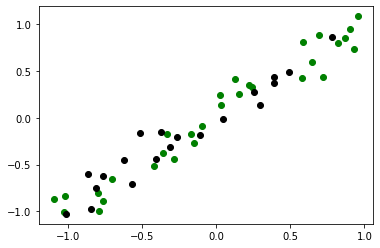

In [9]:
# Vẽ minh họa với matplotlib
plt.scatter(x_train, y_train, color='green') # bộ học
plt.scatter(x_test, y_test, color='black') # bộ test

# plt.xticks(())
# plt.yticks(())

plt.show()

In [10]:
# Tạo đối tượng LinearRegression (Create linear regression object)
regr = linear_model.LinearRegression()

In [11]:
# Học mô hình (Train the model using the training sets):
regr.fit(x_train, y_train)

LinearRegression()

In [12]:
# In tham số đã học được:
# f(x1,..,xn) = a0 + a1*x1 + a2*x2 + … +  an*xn (y = ax + b)
    # coef_ là [a1, a2,..,an] (~ a)
    # intercept_ là a0        (~ b)
print(regr.coef_, regr.intercept_)

[0.98275193] 0.02473739865172364
